In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class GeometricTransformations:
    """Class to apply geometric transformations on an image."""
    def __init__(self, image_path):
        """
        Initialize the transformer with an image.

        Args:
        - image_path (str): Path to the image file.
        """
        self.image = cv2.imread(image_path)

    def show(self, title, img):
        """
        Display the image with a given title in a Jupyter Notebook.

        Args:
        - title (str): Image title.
        - img (np.array): Image data to display.
        """
        plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR image to RGB for displaying with matplotlib
        plt.title(title)
        plt.axis('off')
        plt.show()

    def rotate(self, angle):
        """
        Rotate the image by a certain angle.

        Args:
        - angle (float): Angle by which the image should be rotated.

        Returns:
        - rotated (np.array): Rotated image.
        """
        (h, w) = self.image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(self.image, M, (w, h))
        return rotated

    def translate(self, x, y):
        """
        Shift the image vertically and/or horizontally.

        Args:
        - x (int): Shift in the horizontal direction.
        - y (int): Shift in the vertical direction.

        Returns:
        - shifted (np.array): Shifted image.
        """
        M = np.float32([[1, 0, x], [0, 1, y]])
        shifted = cv2.warpAffine(self.image, M, (self.image.shape[1], self.image.shape[0]))
        return shifted

    def scale(self, fx, fy):
        """
        Resize the image.

        Args:
        - fx (float): Scaling factor along the horizontal axis.
        - fy (float): Scaling factor along the vertical axis.

        Returns:
        - resized (np.array): Resized image.
        """
        resized = cv2.resize(self.image, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
        return resized

    def flip(self, mode):
        """
        Flip the image.

        Args:
        - mode (int): 0 for vertical flip, 1 for horizontal flip, -1 for both axes.

        Returns:
        - flipped (np.array): Flipped image.
        """
        flipped = cv2.flip(self.image, mode)
        return flipped

    def shear(self, x_shear=0, y_shear=0):
        """
        Shear the image.

        Args:
        - x_shear (float): Shearing factor along the horizontal axis.
        - y_shear (float): Shearing factor along the vertical axis.

        Returns:
        - sheared (np.array): Sheared image.
        """
        M = np.float32([[1, x_shear, 0], [y_shear, 1, 0]])
        sheared = cv2.warpAffine(self.image, M, (self.image.shape[1], self.image.shape[0]))
        return sheared

    def zoom(self, x1, y1, x2, y2):
        """
        Zoom into a region of the image.

        Args:
        - x1, y1 (int, int): Top-left corner coordinates of the zoom region.
        - x2, y2 (int, int): Bottom-right corner coordinates of the zoom region.

        Returns:
        - zoomed (np.array): Zoomed image.
        """
        zoomed = self.image[y1:y2, x1:x2]
        return zoomed

    def crop(self, x1, y1, x2, y2):
        """
        Crop a region of the image.

        Args:
        - x1, y1 (int, int): Top-left corner coordinates of the crop region.
        - x2, y2 (int, int): Bottom-right corner coordinates of the crop region.

        Returns:
        - cropped (np.array): Cropped image.
        """
        cropped = self.image[y1:y2, x1:x2]
        return cropped

In [3]:
class ColorSpaceTransformations:
    def __init__(self, image_path):
        """
        Initialize the transformer with an image.

        Args:
        - image_path (str): Path to the image file.
        """
        self.image = cv2.imread(image_path)

    def show(self, title, img):
        """
        Display the image with a given title in a Jupyter Notebook.

        Args:
        - title (str): Image title.
        - img (np.array): Image data to display.
        """
        plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

    def adjust_brightness(self, factor=1.0):
        """
        Adjust the brightness of the image.

        Args:
        - factor (float): Factor by which to adjust the brightness. >1 to increase brightness, <1 to decrease.

        Returns:
        - np.array: Image with adjusted brightness.
        """
        return cv2.convertScaleAbs(self.image, alpha=factor, beta=0)

    def adjust_contrast(self, factor=1.0):
        """
        Adjust the contrast of the image.

        Args:
        - factor (float): Factor by which to adjust the contrast. >1 to increase contrast, <1 to decrease.

        Returns:
        - np.array: Image with adjusted contrast.
        """
        return cv2.convertScaleAbs(self.image, alpha=factor)

    def adjust_saturation(self, factor=1.0):
        """
        Adjust the saturation of the image.

        Args:
        - factor (float): Factor by which to adjust the saturation. >1 to increase saturation, <1 to decrease.

        Returns:
        - np.array: Image with adjusted saturation.
        """
        hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
        hsv[:, :, 1] = hsv[:, :, 1] * factor
        return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    def adjust_hue(self, delta):
        """
        Adjust the hue of the image.

        Args:
        - delta (int): Amount by which to adjust the hue. Can range from -180 to 180.

        Returns:
        - np.array: Image with adjusted hue.
        """
        hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
        hsv[:, :, 0] = (hsv[:, :, 0] + delta) % 180
        return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    def gamma_correction(self, gamma=1.0):
        """
        Apply gamma correction to the image.

        Args:
        - gamma (float): Value for gamma correction.

        Returns:
        - np.array: Gamma corrected image.
        """
        table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
        return cv2.LUT(self.image, table)

In [4]:
class NoiseInjection:
    def __init__(self, image_path):
        """
        Initialize the transformer with an image.

        Args:
        - image_path (str): Path to the image file.
        """
        self.image = cv2.imread(image_path)

    def show(self, title, img):
        """
        Display the image with a given title in a Jupyter Notebook.

        Args:
        - title (str): Image title.
        - img (np.array): Image data to display.
        """
        plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

    def add_gaussian_noise(self, mean=0, sigma=25):
        """
        Add Gaussian noise to the image.

        Args:
        - mean (float): Mean of the Gaussian noise.
        - sigma (float): Standard deviation of the Gaussian noise.

        Returns:
        - np.array: Noisy image.
        """
        row, col, ch = self.image.shape
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        noisy = self.image + gauss
        return np.clip(noisy, 0, 255).astype(np.uint8)

    def add_salt_pepper_noise(self, salt_prob=0.01, pepper_prob=0.01):
        """
        Add salt and pepper noise to the image.

        Args:
        - salt_prob (float): Probability of salt noise.
        - pepper_prob (float): Probability of pepper noise.

        Returns:
        - np.array: Noisy image.
        """
        noisy = self.image.copy()
        total_pixels = self.image.size
        
        # Salt noise
        num_salt = np.ceil(salt_prob * total_pixels)
        salt_coords = [np.random.randint(0, i-1, int(num_salt)) for i in self.image.shape]
        noisy[salt_coords[0], salt_coords[1], :] = 255
        
        # Pepper noise
        num_pepper = np.ceil(pepper_prob * total_pixels)
        pepper_coords = [np.random.randint(0, i-1, int(num_pepper)) for i in self.image.shape]
        noisy[pepper_coords[0], pepper_coords[1], :] = 0
        
        return noisy

    def add_speckle_noise(self, intensity=0.1):
        """
        Add speckle noise to the image.

        Args:
        - intensity (float): Intensity of the speckle noise. The higher the value, the more noise.

        Returns:
        - np.array: Noisy image.
        """
        row, col, ch = self.image.shape
        gauss = intensity * np.random.randn(row, col, ch)
        noisy = self.image + self.image * gauss
        return np.clip(noisy, 0, 255).astype(np.uint8)


In [5]:
class BlurAndSharpen:
    def __init__(self, image_path):
        """
        Initialize the transformer with an image.

        Args:
        - image_path (str): Path to the image file.
        """
        self.image = cv2.imread(image_path)

    def show(self, title, img):
        """
        Display the image with a given title in a Jupyter Notebook.

        Args:
        - title (str): Image title.
        - img (np.array): Image data to display.
        """
        plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

    def average_blur(self, ksize=(5,5)):
        """
        Apply average blurring.

        Args:
        - ksize (tuple): Kernel size. It should be odd and can have different dimensions.

        Returns:
        - np.array: Blurred image.
        """
        return cv2.blur(self.image, ksize)

    def gaussian_blur(self, ksize=(5,5), sigmaX=0):
        """
        Apply Gaussian blurring.

        Args:
        - ksize (tuple): Kernel size. It should be odd and can have different dimensions.
        - sigmaX (float): Standard deviation in X. If set to 0, it's calculated from ksize.

        Returns:
        - np.array: Blurred image.
        """
        return cv2.GaussianBlur(self.image, ksize, sigmaX)

    def median_blur(self, ksize=5):
        """
        Apply median blurring.

        Args:
        - ksize (int): Kernel size. It should be odd.

        Returns:
        - np.array: Blurred image.
        """
        return cv2.medianBlur(self.image, ksize)

    def bilateral_filter(self, d=9, sigmaColor=75, sigmaSpace=75):
        """
        Apply bilateral filtering.

        Args:
        - d (int): Diameter of pixel neighborhood.
        - sigmaColor (float): Filter sigma in color space.
        - sigmaSpace (float): Filter sigma in coordinate space.

        Returns:
        - np.array: Filtered image.
        """
        return cv2.bilateralFilter(self.image, d, sigmaColor, sigmaSpace)

    def sharpen(self):
        """
        Apply sharpening using a kernel.

        Returns:
        - np.array: Sharpened image.
        """
        kernel = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])
        return cv2.filter2D(self.image, -1, kernel)

In [6]:
class RandomErasing:
    def __init__(self, image_path):
        """
        Initialize the transformer with an image.

        Args:
        - image_path (str): Path to the image file.
        """
        self.image = cv2.imread(image_path)

    def show(self, title, img):
        """
        Display the image with a given title in a Jupyter Notebook.

        Args:
        - title (str): Image title.
        - img (np.array): Image data to display.
        """
        plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

    def random_erasing(self, probability=0.5, sl=0.02, sh=0.4, r1=0.3, value=0):
        """
        Apply Random Erasing (Cutout).

        Args:
        - probability (float): Probability to perform Random Erasing.
        - sl (float): Minimum proportion of erased area against input image.
        - sh (float): Maximum proportion of erased area against input image.
        - r1 (float): Minimum aspect ratio of erased area.
        - value (int or tuple): Erasing value. Single int for grayscale, 3-tuple for RGB.

        Returns:
        - np.array: Image after Random Erasing.
        """
        if np.random.rand() > probability:
            return self.image

        H, W, C = self.image.shape
        S = H * W

        while True:
            Se = np.random.uniform(sl, sh) * S
            re = np.random.uniform(r1, 1/r1)

            He = int(np.sqrt(Se * re))
            We = int(np.sqrt(Se / re))
            
            xe = np.random.randint(0, W)
            ye = np.random.randint(0, H)

            if xe + We <= W and ye + He <= H:
                break

        if isinstance(value, tuple) and len(value) == C:
            for c in range(C):
                self.image[ye:ye+He, xe:xe+We, c] = value[c]
        else:
            self.image[ye:ye+He, xe:xe+We, :] = value

        return self.image

In [7]:
class AffineTransformer:
    def __init__(self, image_path):
        """
        Initialize the transformer with an image.

        Args:
        - image_path (str): Path to the image file.
        """
        self.image = cv2.imread(image_path)

    def show(self, title, img):
        """
        Display the image with a given title in a Jupyter Notebook.

        Args:
        - title (str): Image title.
        - img (np.array): Image data to display.
        """
        plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

    def translate(self, x, y):
        """
        Translate the image.

        Args:
        - x (float): Translation along the x-axis.
        - y (float): Translation along the y-axis.

        Returns:
        - np.array: Translated image.
        """
        M = np.float32([[1, 0, x], [0, 1, y]])
        rows, cols, _ = self.image.shape
        return cv2.warpAffine(self.image, M, (cols, rows))

    def rotate(self, angle, center=None):
        """
        Rotate the image.

        Args:
        - angle (float): Angle of rotation in degrees.
        - center (tuple): Center point for rotation. If None, it uses the center of the image.

        Returns:
        - np.array: Rotated image.
        """
        rows, cols, _ = self.image.shape
        if center is None:
            center = (cols / 2, rows / 2)
        M = cv2.getRotationMatrix2D(center, angle, 1)
        return cv2.warpAffine(self.image, M, (cols, rows))

    def scale(self, fx, fy):
        """
        Scale the image.

        Args:
        - fx (float): Scaling factor along the x-axis.
        - fy (float): Scaling factor along the y-axis.

        Returns:
        - np.array: Scaled image.
        """
        return cv2.resize(self.image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)


In [8]:
class CutMixAugmenter:
    def __init__(self, image_path1, image_path2, label1, label2, target_size=(224, 224)):
        """
        Initialize the augmenter with two images and their corresponding labels.

        Args:
        - image_path1 (str): Path to the first image file.
        - image_path2 (str): Path to the second image file.
        - label1 (np.array): One-hot encoded label for the first image.
        - label2 (np.array): One-hot encoded label for the second image.
        - target_size (tuple): Desired size (height, width) to resize the images.
        """
        self.image1 = cv2.resize(cv2.imread(image_path1), target_size)
        self.image2 = cv2.resize(cv2.imread(image_path2), target_size)
        self.label1 = label1
        self.label2 = label2
        assert len(label1) == len(label2), "Both labels must have the same length."

    def show(self, title, img):
        """
        Display the image with a given title in a Jupyter Notebook.

        Args:
        - title (str): Image title.
        - img (np.array): Image data to display.
        """
        plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

    def cutmix(self, alpha=1.0):
        """
        Apply CutMix augmentation on the two images.

        Args:
        - alpha (float): Parameter for the beta distribution.

        Returns:
        - np.array: Augmented image.
        - np.array: New combined label.
        """
        # Randomly sample the lambda value from beta distribution
        lam = np.random.beta(alpha, alpha)
        
        # Randomly select a region in the first image
        height, width, _ = self.image1.shape
        rx = np.random.randint(width)
        ry = np.random.randint(height)
        rw = int(width * np.sqrt(1. - lam))
        rh = int(height * np.sqrt(1. - lam))

        x1 = max(rx - rw // 2, 0)
        x2 = min(rx + rw // 2, width)
        y1 = max(ry - rh // 2, 0)
        y2 = min(ry + rh // 2, height)
        
        # Calculate the proportion of the mix
        mix_ratio = (x2 - x1) * (y2 - y1) / (width * height)
        
        # Replace the selected region in the first image with the corresponding region from the second image
        blended_image = self.image1.copy()
        blended_image[y1:y2, x1:x2] = self.image2[y1:y2, x1:x2]
        
        # Combine the labels based on the mix ratio
        new_label = (1 - mix_ratio) * self.label1 + mix_ratio * self.label2
        
        return blended_image, new_label

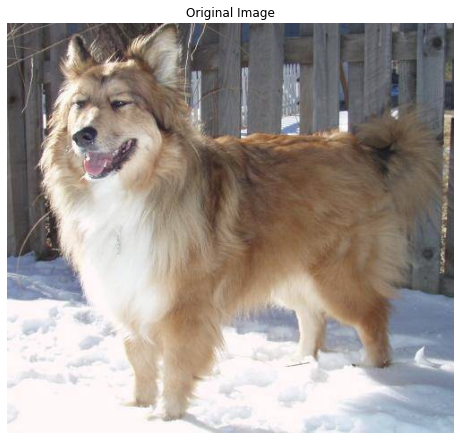

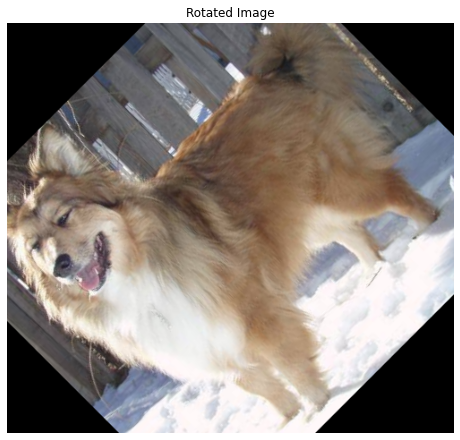

In [9]:
# Sample usage
transformer = GeometricTransformations("dog.4006.jpg")
transformer.show("Original Image", transformer.image)

rotated_image = transformer.rotate(45)
transformer.show("Rotated Image", rotated_image)

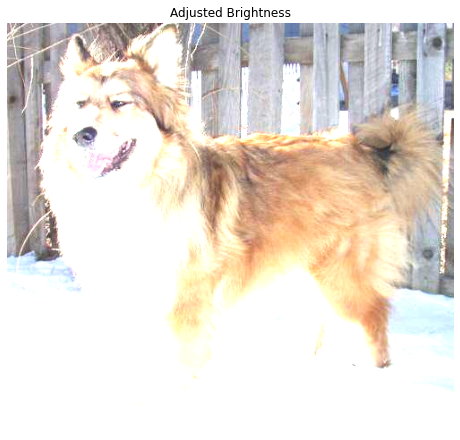

In [10]:
# Sample usage
transformer = ColorSpaceTransformations("dog.4006.jpg")
adjusted_image = transformer.adjust_brightness(2)
transformer.show("Adjusted Brightness", adjusted_image)

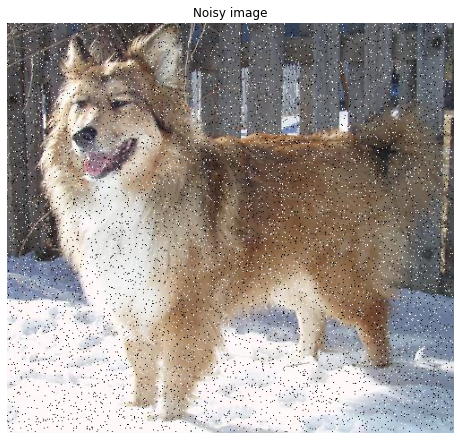

In [13]:
# Sample usage
transformer = NoiseInjection("dog.4006.jpg")
adjusted_image = transformer.add_salt_pepper_noise(salt_prob=0.01, pepper_prob=0.01)
transformer.show("Noisy image", adjusted_image)

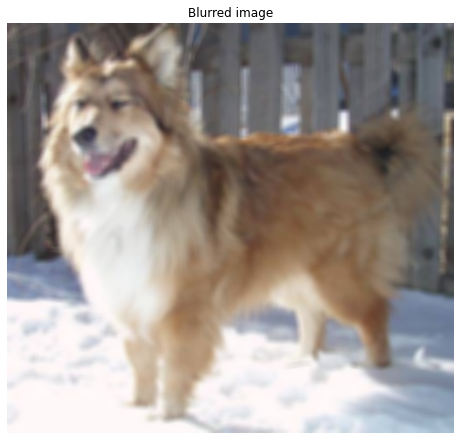

In [15]:
# Sample usage
transformer = BlurAndSharpen("dog.4006.jpg")
adjusted_image = transformer.average_blur(ksize=(7,7))
transformer.show("Blurred image", adjusted_image)

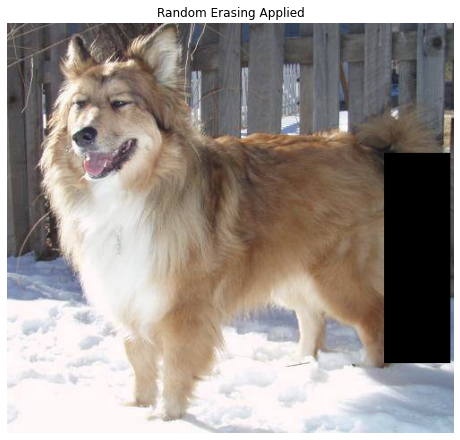

In [16]:
# Sample usage
eraser = RandomErasing("dog.4006.jpg")
processed_image = eraser.random_erasing(value=(0, 0, 0))  # Using black for cutout
eraser.show("Random Erasing Applied", processed_image)


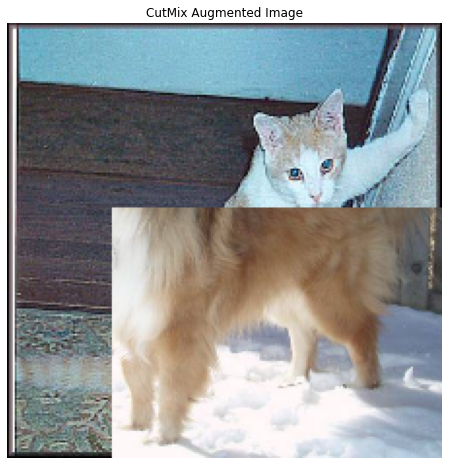

New label: [0.56293846 0.43706154]


In [43]:
# Sample usage
label1 = np.array([1, 0])  # Example label for the first image (e.g., [1, 0] for class 1)
label2 = np.array([0, 1])  # Example label for the second image (e.g., [0, 1] for class 2)
augmenter = CutMixAugmenter("cat.4001.jpg", "dog.4006.jpg", label1, label2)
processed_image, new_label = augmenter.cutmix()
augmenter.show("CutMix Augmented Image", processed_image)
print("New label:", new_label)
